In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike_df = pd.read_csv("train_bike.csv")
bike_df.shape

(10886, 12)

In [3]:
# datetime 타입으로 날짜 변경
bike_df["datetime"] = bike_df["datetime"].apply(pd.to_datetime)
bike_df["year"] = bike_df["datetime"].apply(lambda x : x.year)
bike_df["month"] = bike_df["datetime"].apply(lambda x : x.month)
bike_df["day"] = bike_df["datetime"].apply(lambda x : x.day)
bike_df["hour"] = bike_df["datetime"].apply(lambda x : x.hour)
bike_df["year"].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [4]:
drop_columns = ["datetime", "casual", "registered"]
bike_df.drop(drop_columns, axis = 1, inplace = True)

In [5]:
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


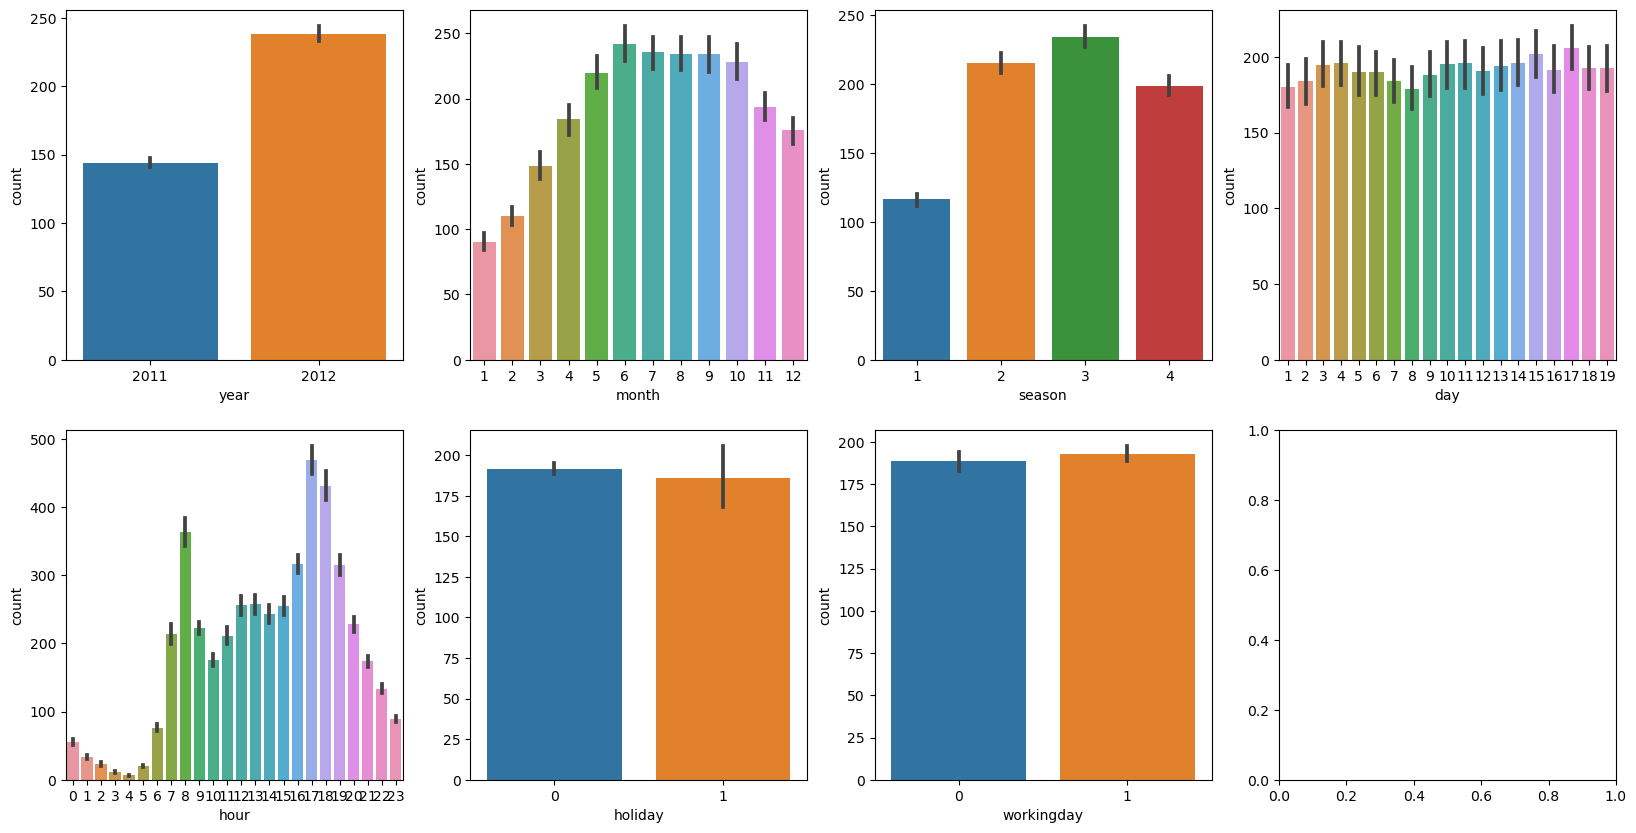

In [6]:
fig, axs = plt.subplots(figsize = (20, 10), ncols = 4, nrows = 2)
cat_features = ["year", "month", "season", "day", "hour", "holiday", "workingday"]
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x = feature, y = "count", data = bike_df, ax = axs[row][col])

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print(rmsle_val, rmse_val, mae_val)
    

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df["count"]
X_features = bike_df.drop(["count"], axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
evaluate_regr(y_test, pred)

1.16466362371087 140.89958867165575 105.92444835101158


C:\Users\user\AppData\Local\Temp\ipykernel_14816\3718748947.py:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [10]:
# 회귀 분석 시 error를 찾을 수 있는 함수
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns = ["real_count"])
    result_df["predicted_count"] = np.round(pred)
    result_df["diff"] = np.abs(result_df["real_count"] - result_df["predicted_count"])
    return result_df.sort_values("diff", ascending=False)[:n_tops]

In [11]:
get_top_error_data(y_test, pred)

,real_count,predicted_count,diff
1618,890,322.0,568.0
3151,798,241.0,557.0
966,884,327.0,557.0
412,745,194.0,551.0
2817,856,310.0,546.0


<AxesSubplot:>

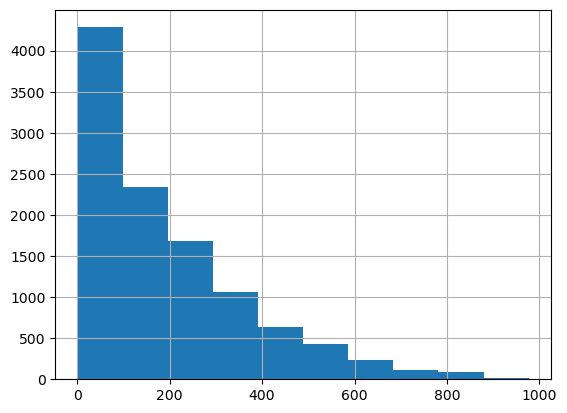

In [12]:
y_target.hist()

In [13]:
# log 변환
y_log_transform = np.log1p(y_target)

In [14]:
y_log_transform

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [15]:
y_target_log = y_log_transform

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
evaluate_regr(y_test, pred)

0.23180545597867702 1.0168265982003433 0.8014561689021769


In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
pred = lr.predict(X_test)

<AxesSubplot:>

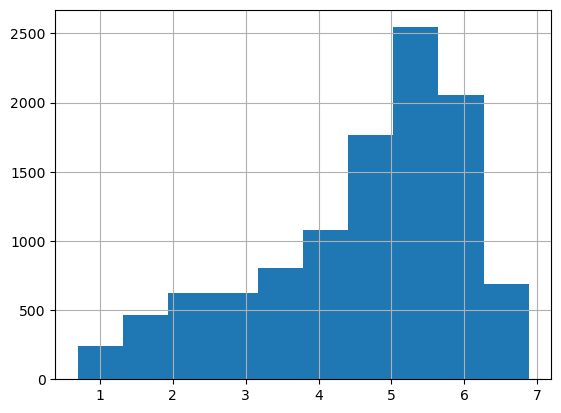

In [19]:
y_target_log.hist()

In [20]:
# 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1으로 스케일 변환
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

In [21]:
evaluate_regr(y_test_exp, pred_exp)

1.0168265982003428 162.5942680900461 109.28615860077537


In [22]:
X_features["year"].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [23]:
X_features["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [24]:
# 회귀에서 숫자형 카테고리 값을 적용시킬 경우 오차 발생할 확률이 더욱 높다. 따라서 one-hot encoding을 적용한다.
from sklearn.preprocessing import OneHotEncoder
X_features_ohe = pd.get_dummies(X_features, columns = ["year", "month", "day", "hour", "holiday", "workingday", "season", "weather"])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state=0)
# 모델 별 학습 후 성능 평가 수치 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    evaluate_regr(y_test, pred)
X_train

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
8620,32.80,37.120,52,11.0014,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
8985,32.80,35.605,36,0.0000,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
6171,4.92,6.820,50,12.9980,0,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
6473,11.48,13.635,61,15.0013,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
10877,17.22,21.210,50,19.0012,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,22.14,25.760,60,15.0013,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3264,28.70,32.575,65,15.0013,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9845,27.06,31.060,39,27.9993,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10799,14.76,17.425,87,8.9981,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [31]:
lr = LinearRegression()
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 0.01)

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test, True)

0.5896334153504668 97.68733096388357 63.381998182034
0.5901367703437249 98.52859077604558 63.89335277110792
0.6347518077052988 113.21881019147774 72.80270669734962


In [28]:
X_features_ohe.shape

(10886, 73)

In [29]:
X_test.shape

(7620,)

In [32]:
coef = pd.Series(lr.coef_, index = X_features_ohe.columns)

In [36]:
coef_sort = coef.sort_values(ascending = False)[:20]

<AxesSubplot:>

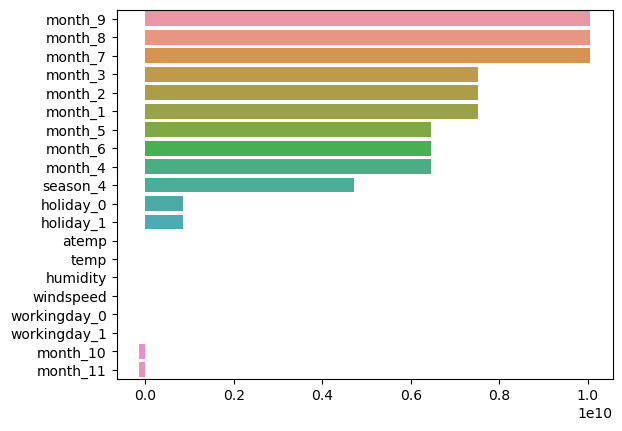

In [37]:
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
rf = RandomForestRegressor(n_estimators=500)
gbm = GradientBoostingRegressor(n_estimators = 500)
xgb = XGBRegressor(n_estimators = 500)
lgbm = LGBMRegressor(n_estimators=500)
for model in [rf, gbm, xgb, lgbm]:
    get_model_predict(model, X_train,X_test, y_train, y_test, True)

0.35410560337351776 50.27304940155441 31.11988620731827
0.32990265442178407 53.359996424503954 32.75689345669301


c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.3422048283339225 51.73158151916774 31.251221714159207
0.3188456499157367 47.21464677592674 29.028770412428237
